# **Problem 2** 


#### **Task 2a)**

- Implement an logistic discrimination classifier and use the training data to train the classifier.
- Use stochastic gradient descent and implement it in Python. 
- Plot the training error as a function of epochs, and report the accuracy on the training set. 
- *Try different learning rates for the gradient descent*

Explain what you observe for these different values. Optional, it may help the learning process if the
data is shuffled (songs are fed to the classifier in random order).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# Load in the arrays from problem-1.ipynb
X_train = np.load('X_train.npy', allow_pickle=True)
X_test = np.load('X_test.npy', allow_pickle=True)
y_train = np.load('y_train.npy', allow_pickle=True)
y_test = np.load('y_test.npy', allow_pickle=True)

Epoch 1, Loss: 0.5326
Epoch 2, Loss: 0.4431
Epoch 3, Loss: 0.3874
Epoch 4, Loss: 0.3513
Epoch 5, Loss: 0.3275
Epoch 6, Loss: 0.3087
Epoch 7, Loss: 0.2966
Epoch 8, Loss: 0.2874
Epoch 9, Loss: 0.2794
Epoch 10, Loss: 0.2733
Epoch 11, Loss: 0.2692
Epoch 12, Loss: 0.2650
Epoch 13, Loss: 0.2619
Epoch 14, Loss: 0.2583
Epoch 15, Loss: 0.2564
Epoch 16, Loss: 0.2557
Epoch 17, Loss: 0.2540
Epoch 18, Loss: 0.2517
Epoch 19, Loss: 0.2511
Epoch 20, Loss: 0.2502
Epoch 21, Loss: 0.2487
Epoch 22, Loss: 0.2487
Epoch 23, Loss: 0.2473
Epoch 24, Loss: 0.2474
Epoch 25, Loss: 0.2467


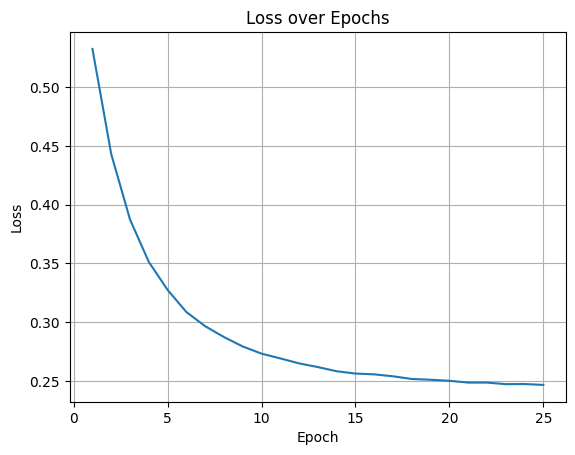

In [2]:
# this function converts the weighted sum (z) to a probability [0-1]
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Compute the cost (loss) for each sample
# yi -> The actual label for the sample
# y_pred -> the predicted value from the sigmoid function
def compute_cost(yi,y_pred):
    cost = -(yi * np.log(y_pred)+ (1-yi) * np.log(1- y_pred))
    return cost # The loss for the current sample
 

 
# Function to compute gradients
# For bias and weight
# Tells how much to adjust Weight and bias to reduce the error
def compute_gradients(xi, yi, y_pred ):
    error = y_pred - yi
    dw = error * xi
    db = error
    return dw, db

# Function to update w and b
# dw and db are the gradients computed in the 'compute_gradients' function
def update_parameters(w, b, dw, db, learning_rate):
    w = w - learning_rate * dw
    b = b - learning_rate * db
    return w, b # return the new weight and bias
    
def logistic_regression(X, y, learning_rate=0.001, epochs=25):
    # Get the number of samples and features
    number_of_samples, number_of_features = X.shape
  
    # Initialize weights and bias
    w = np.zeros(number_of_features) 
    b = 0
    losses = [] 
  
    for epoch in range(epochs):
        total_loss = 0
        # Variable to keep track of total loss for each iteration over the dataset
        # Shuffle the data at the start of each epoch
        indices = np.random.permutation(number_of_samples)
        X_shuffled = X[indices]
        y_shuffled = y[indices]
    
        # Loop to update the Gradient Descent using SGD
        for i in range(number_of_samples):
            
            xi = X_shuffled[i]  # feature vector for sample i
            yi = y_shuffled[i]  # true label for sample i
            # Compute the weighted sum (linear combination of features and weights)
            z = np.dot(xi, w) + b  # z is the weighted sum for the current sample
            # print(f'The sum: {z}')
            # Pass the weighted sum to the sigmoid function to get the predicted probability
            y_pred = sigmoid(z)
            # Compute cost
            cost = compute_cost(yi, y_pred)
            total_loss += cost
            # Compute the gradients
            dw, db = compute_gradients(xi, yi, y_pred)
            # Update parameters
            w, b = update_parameters(w, b, dw, db, learning_rate)
       
        avg_loss = total_loss / number_of_samples
        losses.append(avg_loss) 
        print(f"Epoch {epoch + 1}, Loss: {avg_loss:.4f}")
     
    return w, b, losses

# Train model using the training sets
w, b, losses = logistic_regression(X=X_test, y=y_test)



plt.plot(range(1, len(losses) + 1), losses)
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

In [3]:
def calculate_accuracy(y, y_pred):
    # Convert probabilities to binary predictions (0 or 1)
    y_pred_binary = np.where(y_pred >= 0.5, 1, 0)
    accuracy = np.sum(y == y_pred_binary) / len(y)
    return accuracy

y_pred = sigmoid(np.dot(X_train, w) + b)  
accuracy = calculate_accuracy(y=y_train, y_pred=y_pred)
print(f'Accuracy: {accuracy * 100:.2f}')



Accuracy: 92.77


#### **Task 2b)**

- Test your trained logistic discrimination classifier using the test set. 
- Report the accuracy on the test set.

Is there a significant difference between the accuracy on the training and test set? If so what might that indicate. 

In [4]:

y_test_pred = sigmoid(np.dot(X_test, w) + b)
test_accuracy = calculate_accuracy(y_test, y_test_pred)
print(f"Accuracy: {test_accuracy * 100:.2f}%") 

Accuracy: 92.17%


# **Problem 3** 

#### **Task 3a)**

Using the classification results from the test set in problem 2, create a confusion matrix for the classification.
- Report the confusion matrix.


In [5]:
from sklearn.metrics import confusion_matrix 
# Convert the test results to a binary number (0 or 1)
# If the predicted probability is greater or equal to 0.5 --> set the value to 1, 
# --> else set it to 0 
y_test_pred_binary = np.where(y_test_pred >= 0.5, 1, 0)

# Got this syntax from https://scikit-learn.org
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred_binary).ravel()

print(f"True negative: {tn}")
print(f"False positive: {fp}")
print(f"False negative: {fn}")
print(f"True positive: {tp}")

True negative: 1642
False positive: 210
False negative: 82
True positive: 1796


#### **Task 3b)**
You should now have two evaluation metrics for the performance of the classifier on the test set.
(accuracy and the confusion matrix)

- What information does the confusion matrix give you that the accuracy score
does not?

My answer to `Task 3b)`
is in the report